In [1]:
#Question2 on Stochastic gradient descent

#Part A : Data sampling

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# this is how data can be generated
mean =10
std = 1
data_sample = np.random.normal(mean,std,1000)
# print(data_sample)
count, bins, ignored = plt.hist(data_sample, 50, normed=True) 
# print(count)
# print(bins)
# print(ignored)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
          np.exp( - (bins - mean)**2 / (2 * std**2) ), 
          linewidth=2, color='r') 
plt.show() 

c:\users\chinmay\appdata\local\programs\python\python35-32\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 640x480 with 1 Axes>

In [2]:
# Data generated here

# million data points normally distributed
data_size = int(1e6)
m = data_size
x1_list = np.random.normal(3,np.sqrt(4),data_size)
x2_list = np.random.normal(-1,np.sqrt(4),data_size)
noise_list = np.random.normal(0,np.sqrt(2),data_size)
# print(noise_list[:10])

# x1_list = sorted(x1_list,key=float)
# pdf1 = stats.norm.pdf(x1_list,3,2)
# x2_list = sorted(x2_list,key=float)
# pdf2 = stats.norm.pdf(x2_list,-1,2)
# noise_list = sorted(noise_list,key=float)
# pdf3 = stats.norm.pdf(noise_list,0,np.sqrt(2))


# plt.plot(x1_list,pdf1)
# plt.plot(x2_list,pdf2)
# plt.plot(noise_list,pdf3)



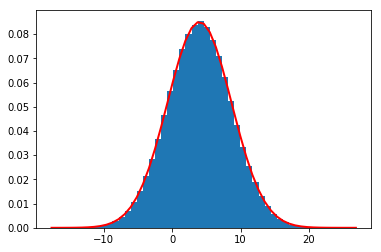

In [3]:
# given theta_vector and x1 and x2 vectors , lets try to see the distribution of yi with error vector 

# 3x1
theta = np.array([[ 3,1,2 ]])
theta = theta.T

# mx1
epsilon = np.array([noise_list])
epsilon = epsilon.T           

# method to add rows in matrix
#theta = np.vstack((theta,np.array([[4]])))
#theta.shape


# mx3
x_vector = np.array([[ 1,x1_list[0], x2_list[0] ]])

# takes a lot of time to append for million data points
#--------------------------------------
# for i in range(len(x1_list)-1):
#     new_sample = np.array([[ 1 , x1_list[i+1], x2_list[i+1]    ]])
#     x_vector = np.vstack( ( x_vector , new_sample ) )

# print(x_vector.shape)    

# y_vector = np.matmul(x_vector,theta) + epsilon
#-----------------------------------------------------



# approach 2, still takes time but lesser
# y_list =[]
# for i in range(len(x1_list)):
#     y_list.append(  theta[0][0]*1 + theta[1][0]*x1_list[i] + theta[2][0]*x2_list[i] + epsilon[i][0]   )

# y_vector = np.array([y_list])
# y_vector = y_vector.T
#--------------------------------------------------------------------


#Approach3 : column appending


x_vector = np.ones((int(1e6),1))

x1_vector = np.array([x1_list])
x1_vector = x1_vector.T

x2_vector = np.array([x2_list])
x2_vector = x2_vector.T

x_vector = np.append( x_vector, x1_vector,axis = 1 )

x_vector = np.append( x_vector, x2_vector,axis = 1 )
y_vector = np.matmul(x_vector,theta) + epsilon




# print(y_vector[:10])


mean = np.mean(y_vector)
std = np.std(y_vector)

count, bins, ignored = plt.hist(y_vector, 50, normed=True) 
# print(count)
# print(bins)
# print(ignored)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
          np.exp( - (bins - mean)**2 / (2 * std**2) ), 
          linewidth=2, color='r') 
plt.show() 
# it also seems to follow normal distribution with mean (theta.T*X)


In [4]:
def grad_J_theta(x_vec,y_vec,theta):  # X : mx3   ,  Y : mx1   , theta : 3x1
    
    abs_error =  y_vec - (x_vec @ theta)
    #print(abs_error)
    delta = abs_error.T @ x_vec     # matrix multiplication summation happening here
    delta = delta.T
    cost = (1.0/(2*len(x_vec)))* ( abs_error.T @ abs_error  )
    cost = cost[0][0]
    return delta/len(x_vec)
    


In [5]:
def cost(x_vec,y_vec,theta):
    abs_error =  y_vec - (x_vec @ theta)
    #cost = (1.0/(2*len(x_vec)))* ( abs_error.T @ abs_error  )
    cost = (1.0/2)* ( abs_error.T @ abs_error  )
    return cost[0][0]/len(x_vec)

In [6]:
#------------------------ STOCHASTIC GRADIENT DESCENT--------------------------------------------------

# x_vector  : mx3
# y_vector  : mx1

#Initialize theta
theta = np.zeros(3).reshape(3,1)

#batch_size = 1000



#Shuffle the data
x_y_vector = np.append(x_vector,y_vector,axis = 1)
np.random.shuffle(x_y_vector)          # taking time



    


In [7]:
def min_max_diff(history):   # returns min and max vectors 3x1
    temp =  history[0]
    for i in range( 1,len(history) ):
        temp = np.append(temp,history[i],axis=1)
    #print(temp)
    min = np.amin(temp,axis=1).T
    max = np.amax(temp,axis=1).T
    #print(max - min < 2)
    return min,max

In [8]:


learning_rate = 0.001
converged = False 
prev_cost = 99999
curr_cost = 0
avg_over = 100000
batch_size = 10000   # Note re initialized
examples = 0
total_cost = 0
total_batches = m//batch_size     # to handle boundry case

update_limit = 20000
update=0

history0=[]
history1=[]
history2=[]

plot_theta_0=[]
plot_theta_1=[]
plot_theta_2=[]

error = 1e-4
#history.append(theta)


while converged == False :
  
    for b in range(total_batches):
        
        xb = x_vector[ b*batch_size : (b+1)*batch_size ]
        yb = y_vector[ b*batch_size : (b+1)*batch_size ]
        
        #print(len(xb),b)
        total_cost += cost(xb,yb,theta)
        #print(total_cost)
        examples += batch_size
        
        theta += learning_rate* grad_J_theta(xb,yb,theta)
        #print(theta.T)
        update+=1
        
        plot_theta_0.append(theta[0][0])
        plot_theta_1.append(theta[1][0])
        plot_theta_2.append(theta[2][0])
        
        
        #history.append( theta )
        #print(len(history))
        if len(history0)<=2:
            history0.append(theta[0][0])
            history1.append(theta[1][0])
            history2.append(theta[2][0])
            
        else:
            history0.pop(0)
            history1.pop(0)
            history2.pop(0)
            
            history0.append(theta[0][0])
            history1.append(theta[1][0])
            history2.append(theta[2][0])
            
            if abs( max(history0)-min(history0) ) < error  and abs( max(history1)-min(history1) ) < error  and abs( max(history2)-min(history2) ) < error :
                converged = True
                print("coverged",theta.T)
                print(abs( max(history0)-min(history0) ),abs( max(history1)-min(history1) ),abs( max(history2)-min(history2) ))
                break
        
        
            
            

        
        
        if examples%avg_over == 0 :  # reduces print statements
            
            print(theta.T,print(abs( max(history0)-min(history0) ),abs( max(history1)-min(history1) ),abs( max(history2)-min(history2) )))
            
#             curr_cost = total_cost/( avg_over/batch_size )        # total cost / no. of itrs
#             #print(theta.T,curr_cost,abs(prev_cost - curr_cost),update,len(history))
#             if abs(prev_cost - curr_cost) < 1e-3 :
#                 #converged = True
#                 break
#             else:
#                 prev_cost = curr_cost
#                 curr_cost = 0
#                 total_cost = 0
#                 examples = 0
            
        





0.007299565632759804 0.02939816827539357 0.008381561760259108
[[0.03790762 0.1513642  0.0412649 ]] None
0.006383961213059605 0.02496442691017603 0.009009675583144944
[[0.07166991 0.28409466 0.08539401]] None
0.0057873087827550185 0.022292184428625628 0.0093888855109924
[[0.10188832 0.40129923 0.13110012]] None
0.005259752187511055 0.019905516790886868 0.00948179892229642
[[0.12883811 0.50433356 0.1780129 ]] None
0.004686515394182994 0.01747164691898151 0.009402697058375403
[[0.15303328 0.59541122 0.22578501]] None
0.0040913005393511115 0.014871057161058965 0.009700542688522995
[[0.17468119 0.67481232 0.27413901]] None
0.0038574302212330547 0.013825096419691874 0.009698490116220648
[[0.19467051 0.74675719 0.32231345]] None
0.003506141363931431 0.01187028687715208 0.009518072442944336
[[0.21255834 0.8091241  0.37037134]] None
0.0032961631641159894 0.010922478314642547 0.009677778104736245
[[0.22925549 0.86535862 0.41842569]] None
0.0030068485837841386 0.009711955460361743 0.0090408571044

0.0012070107750495884 0.00014392460903267512 0.0007385546927876074
[[0.7756986  1.45885928 1.76017774]] None
0.0012495720008939282 0.0001634973841990739 0.0006716598079352654
[[0.78177998 1.45875248 1.76371208]] None
0.0012481696386396068 8.12685529101298e-05 0.000629793333594808
[[0.78782608 1.45853798 1.76692686]] None
0.001175553798125395 0.00020100742069351085 0.0006099012781024538
[[0.79377704 1.45805537 1.77012073]] None
0.0011699100725663936 0.00014468535273781669 0.0006058647150712915
[[0.79971606 1.45769741 1.77325258]] None
0.0011823758758117142 0.00012606146215365932 0.0006104411496332673
[[0.80568845 1.45734227 1.77628067]] None
0.0012087924568362496 9.462288915162986e-05 0.000648865094667217
[[0.8116235  1.45677436 1.7794143 ]] None
0.0012021335125933508 0.0001630833248840169 0.0006275321263240485
[[0.81763099 1.45612411 1.78244461]] None
0.0012070112693749468 6.836324968850782e-05 0.0004570788290572114
[[0.82362066 1.4559948  1.78493241]] None
0.001118787585615011 0.00031

0.0009632275281881153 0.0002773669389382061 0.00014247436864978091
[[1.24453047 1.38194331 1.87063382]] None
0.0009721593204177204 0.00017176419011333266 1.6873453209775846e-05
[[1.24935477 1.38127272 1.8708266 ]] None
0.0008912380020251742 0.000390059900853279 0.0001116085296479774
[[1.25405934 1.38001744 1.87144227]] None
0.0009458863945301932 0.00024047731752774304 9.112712671432988e-05
[[1.25882542 1.37888861 1.87200581]] None
0.000981635031828798 0.0001693019865025569 7.606362339718231e-05
[[1.26358782 1.37802863 1.87244622]] None
0.0009835057148179782 7.756188002594477e-05 4.289685914526942e-05
[[1.26832283 1.3771078  1.87268992]] None
0.0009130387185294353 0.000340431098615257 8.168159902388616e-05
[[1.27298033 1.3759712  1.87302108]] None
0.0009106333374186981 0.00025522423213142353 6.109524746511497e-05
[[1.277622   1.37502161 1.87337359]] None
0.0009215052320696859 0.00024424256787769494 9.045451690647965e-05
[[1.28229028 1.37410196 1.87374406]] None
0.0009507821657250837 0.0

0.0007100141789806447 0.0003352295677370165 8.757007997983735e-05
[[1.59556163 1.30619622 1.89849153]] None
0.0007604506599636629 0.00019885667854224742 5.677805004133951e-05
[[1.59939547 1.30524539 1.89890109]] None
0.0007932011137798956 0.00014546776614365875 5.809164050418758e-05
[[1.60323084 1.30454271 1.89919398]] None
0.0007985145908890878 4.8313051595805234e-05 1.3750228060382952e-05
[[1.60704119 1.30377977 1.8993032 ]] None
0.0007296124063309595 0.0003077174211540967 6.672243577932058e-05
[[1.61078605 1.30281202 1.89950149]] None
0.0007254623638868196 0.00022307120003572933 3.6385953473550003e-05
[[1.61450762 1.30202281 1.89971321]] None
0.0007386375030113967 0.00020696433576006257 6.576827892912362e-05
[[1.61825938 1.30129629 1.8999424 ]] None
0.0007684654069997077 0.00012453149940805375 9.842535654569495e-05
[[1.62200789 1.30048051 1.90036941]] None
0.0007521332498861 0.00024148144279423356 0.00010262676152494876
[[1.62579074 1.29950252 1.90079158]] None
0.0007627719810061606

0.000576457284769516 0.00019388490375127354 2.737451336765062e-05
[[1.88546304 1.24286537 1.91956075]] None
0.000591588555260314 0.0001733378768113969 5.624789056191126e-05
[[1.88847772 1.24231203 1.91972868]] None
0.0006218153540307192 8.31305092741097e-05 8.382061543454888e-05
[[1.89149554 1.24167846 1.92009404]] None
0.0006034083854506989 0.00021166523126159298 8.743357250140527e-05
[[1.89453856 1.24085986 1.92045628]] None
0.000615187641446413 0.00010847848520989523 1.5996575928323153e-05
[[1.89759484 1.24049612 1.92044611]] None
0.0005482502957878665 0.00028094402701550614 7.913886392696412e-05
[[1.90054621 1.23966262 1.9208255 ]] None
0.0005947973045750121 0.00015719160625082829 4.0334372431560794e-05
[[1.90354752 1.23889481 1.92116908]] None
0.0006249311332715557 0.00012190445539039807 4.874771626695029e-05
[[1.90655509 1.2383558  1.9213988 ]] None
0.0006333576408144026 2.581983111005215e-05 4.759184174973896e-06
[[1.90953965 1.23775596 1.92145402]] None
0.0005658547084508303 0.

0.00047802797631080196 0.0001276748550698148 2.920991693011743e-05
[[2.11794201 1.1921057  1.93680821]] None
0.0005063193640078012 0.0001052201865383573 4.238110111454141e-05
[[2.12036607 1.19168282 1.93699564]] None
0.0005169414814183426 1.526177856492339e-05 1.2125277667918155e-05
[[2.12276853 1.19119867 1.93701497]] None
0.0004504249293506568 0.0002502361355016802 5.47048456152055e-05
[[2.12512375 1.19052492 1.93712143]] None
0.00044338263567622604 0.00016766892827657642 1.9818871353827205e-05
[[2.12744406 1.19001372 1.93722532]] None
0.00046026555633416066 0.00014314213561505973 4.821382337905078e-05
[[2.1298005  1.18961586 1.93734091]] None
0.0004908465895070435 4.6016649365654416e-05 7.100322723130326e-05
[[2.13216573 1.18914573 1.9376535 ]] None
0.0004705897955332716 0.00018488494500590313 7.429990056806446e-05
[[2.13454804 1.18847022 1.93796443]] None
0.0004833855014321209 8.928441918110153e-05 2.142905706326026e-05
[[2.13695156 1.18823167 1.93791394]] None
0.000421641766273239

[[2.28843567 1.15500653 1.94912095]] None
0.0003841110874516218 0.0001100548660517564 2.0677277823288875e-05
[[2.29037815 1.15447294 1.94938493]] None
0.00041092067174997027 9.179887587507096e-05 3.72671182367057e-05
[[2.29233291 1.15414348 1.94953842]] None
0.000423308742522277 2.3126089220282253e-05 1.859750992938558e-05
[[2.29426718 1.1537524  1.94952894]] None
0.00035758553173037555 0.00023104879971924674 5.0810437209891646e-05
[[2.2961603  1.15317677 1.94960591]] None
0.00034957922256451113 0.00014918454718126917 1.4509091306180721e-05
[[2.29801464 1.15275834 1.94967495]] None
0.00036769702200789567 0.00012185197569603012 4.256602155527922e-05
[[2.29990707 1.15247009 1.94975372]] None
0.00039852768658299453 1.9850781528774064e-05 6.197574399435801e-05
[[2.30181232 1.15211519 1.9500292 ]] None
0.00037696706701284555 0.0001660027280141474 6.505633067144245e-05
[[2.3037289  1.15154057 1.95030403]] None
0.00039047919139534315 8.268209565009954e-05 2.5245078287161604e-05
[[2.3056723  1

0.00028291538560143437 0.00021561636752820412 4.767843806119387e-05
[[2.43372393 1.12313786 1.95964703]] None
0.00027413371932683006 0.0001343175254457929 1.0238956083430395e-05
[[2.43520348 1.12279405 1.95968806]] None
0.0002932447287280482 0.00010472826927787615 3.802399384089661e-05
[[2.43672274 1.12259397 1.95973722]] None
0.00032427616829489025 2.2798171195326233e-06 5.471521912503441e-05
[[2.43825801 1.12233175 1.95998284]] None
0.00030166689302202343 0.00015081572760999862 5.7622216008912375e-05
[[2.4398     1.12183827 1.96022864]] None
0.00031575522622606655 7.737181717337727e-05 2.8313878493335665e-05
[[2.44137333 1.12175898 1.96012699]] None
0.00026061700547996836 0.00018396626714767272 6.475307950526421e-05
[[2.44285401 1.12130471 1.96038435]] None
0.0003002371293661099 9.64265602387826e-05 1.4959767243194477e-05
[[2.44437497 1.12086438 1.96061669]] None
0.00032572336855007933 8.358820017773105e-05 3.270029645907613e-05
[[2.4459106  1.12061836 1.96073987]] None
0.00033968855

0.00025565520723969115 7.31007904462011e-05 3.0782079030622356e-05
[[2.55051682 1.09792671 1.96809095]] None
0.00020288524419509457 0.00016450011211577298 6.186760778748024e-05
[[2.55170231 1.09754856 1.96832384]] None
0.0002411150164745024 8.682006822180455e-05 1.0929548289517754e-05
[[2.55292615 1.09717396 1.96853387]] None
0.0002656684398787412 8.532961285601104e-05 2.9481188519309143e-05
[[2.55416634 1.09698676 1.96863569]] None
0.0002807453206221666 5.0162346209026154e-05 2.845150410313302e-05
[[2.55538777 1.09673739 1.96858235]] None
0.00021623003629178683 0.0002018341829796988 4.488136821256816e-05
[[2.55657729 1.09631114 1.96861442]] None
0.00020675592489860506 0.00012104029089177182 6.425466705151095e-06
[[2.55772215 1.09603396 1.96863041]] None
0.00022675393629745244 8.943566629793231e-05 3.3967685519886714e-05
[[2.55890811 1.09591262 1.96865313]] None
0.0002579646810425551 1.9989139820042467e-05 4.823110323082247e-05
[[2.56011298 1.09573317 1.96887209]] None
0.00023441888742

0.00017988508425759164 8.023172348914365e-05 3.1108425436299214e-05
[[2.64503566 1.07710515 1.97493789]] None
0.00021122221984981593 3.3237407584874035e-05 4.3660499764008875e-05
[[2.64600762 1.07698404 1.97513806]] None
0.0001870162816071108 0.00012769227797804206 4.63032084589976e-05
[[2.64697928 1.0766141  1.97533965]] None
0.00020198193923004482 6.928648266568693e-05 3.2986343633689685e-05
[[2.64798913 1.07664292 1.97520329]] None
0.0001513269860087263 0.00014711555567736845 5.929069220411698e-05
[[2.648911   1.07633276 1.97541433]] None
0.00018831508289318677 7.824083919660829e-05 7.3302981695722025e-06
[[2.64986949 1.07601686 1.97560443]] None
0.00021203544048464806 8.688480897811601e-05 2.660631383366585e-05
[[2.65084583 1.07588218 1.97568717]] None
0.00022810513866255988 6.014522961028668e-05 3.2089992046957505e-05
[[2.65180406 1.07568514 1.97561764]] None
0.00016403586964397476 0.00019104696113569908 4.269212119178967e-05
[[2.65273378 1.07531405 1.97563313]] None
0.00015401978

0.00014218875896432337 7.560849445997775e-05 2.8808740410557476e-05
[[2.7143075  1.06197841 1.97999268]] None
0.00017362754992733542 4.389290670170354e-05 3.998439192054448e-05
[[2.71509214 1.06190423 1.98017774]] None
0.0001488906614803831 0.00012000286525881698 4.253921505381619e-05
[[2.71587414 1.06157537 1.98036463]] None
0.00016414806231290768 6.659780622242373e-05 3.454011290249248e-05
[[2.71669662 1.06164014 1.98021672]] None
0.00011498396337072947 0.00013487925647437393 5.747424409152657e-05
[[2.71743267 1.0613779  1.98041236]] None
0.0001510968127482748 7.219340614073033e-05 6.678641810475838e-06
[[2.71820411 1.06110338 1.98058841]] None
0.00017422994860671892 8.798105485707808e-05 2.4579836623406237e-05
[[2.71899447 1.06100572 1.9806577 ]] None
0.00019099947621548097 6.718208792522162e-05 3.465473441432998e-05
[[2.71976716 1.06084556 1.98057676]] None
0.00012724459998514348 0.00018344313079210472 4.1148937687918163e-05
[[2.72051376 1.06051336 1.98058056]] None
0.0001168464845

In [9]:
print(history0)
print(update)

[2.7564673315781913, 2.7565136445430967, 2.7565647362013674]
8960


In [10]:

print("Final obtained theta :",theta)
cost1  = cost(x_vector,y_vector,theta)
print(cost1)

# theta = np.array([[ 3,1,2 ]])
# theta = theta.T
# cost1  = cost(x_vector,y_vector,theta)
# print(cost1)
# print(x_vector.shape)

Final obtained theta : [[2.75656474]
 [1.05260348]
 [1.98314348]]
1.0112733733485242


In [11]:
test = open("q2test.csv","r")
x1_test=[]
x2_test=[]
y_test=[]

for i,line in enumerate(test):
    if(i==0):
        continue
    #print(line.split(","))
    x1_test.append(float(line.split(",")[0]))
    x2_test.append(float(line.split(",")[1]))
    y_test.append(float(line.split(",")[2].split("\n")[0]))
#print(y_test)    


In [12]:

x_vector = np.ones((len(x1_test),1))
x1_vector = np.array([x1_test])
x1_vector = x1_vector.T

x2_vector = np.array([x2_test])
x2_vector = x2_vector.T

x_vector = np.append( x_vector, x1_vector,axis = 1 )

x_vector = np.append( x_vector, x2_vector,axis = 1 )
y_vector = np.array([y_test]).T

print("learnt theta cost : ",cost(x_vector,y_vector,theta))
print(" Cost with theta\[3,2,1] :",cost(x_vector,y_vector,np.array([[3,1,2]]).T))

learnt theta cost :  1.149973286084196
 Cost with theta\[3,2,1] : 0.9829469215000005


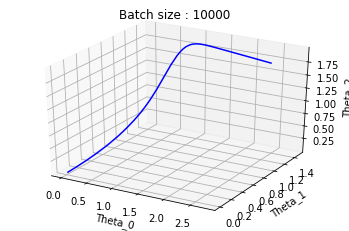

In [13]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot( plot_theta_0 , plot_theta_1, plot_theta_2, color="blue" )
ax.set_xlabel('Theta_0')
ax.set_ylabel('Theta_1')
ax.set_zlabel('Theta_2')
plt.title("Batch size : "+str(batch_size))
plt.show()